# 3.4 뉴스 기사 분류하기(텍스트 분류 기초문제)

- 작성자: [김찬란](https://github.com/seriousran)

## 3.4.1 데이터셋 살펴보기

In [1]:
# 코드 3-76 로이터 데이터셋 불러오기

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=100, test_split=0.2)
print('x_train 길이:', len(x_train))
print('x_test 길이:', len(x_test))

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step
x_train 길이: 8982
x_test 길이: 2246


In [2]:
# 코드 3-77

print(x_train[0])

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]


In [3]:
# 코드 3-78 로이터 워드 인덱스 가져오기

reuters_word_idx = reuters.get_word_index()
print( 'vocab 길이:', len(reuters_word_idx.values()) )

557056/550378 [==============================] - 0s 1us/step
vocab 길이: 30979


In [4]:
# 코드 3-79 딕셔너리 역변환

r_word_idx = dict([(value, key) for (key, value) in reuters_word_idx.items()])
for i in range(1, 6):
  print( r_word_idx[i] )

the
of
to
in
said


In [5]:
# 코드 3-80 인덱스 데이터로부터 역변환하기

for key in x_train[0]:
  print( r_word_idx[key], end=' ' )

the of of mln loss for of said at of of said of of 1 of of april 0 a after said from of and from of 000 april 0 prices its of year a but in this mln of an of of and of and revs vs 000 its of vs 000 a but 3 of of of and of and of vs 000 its of 4 vs 000 1 mln of of april 0 are 2 of will billion of and of 000 pct dlrs 

In [6]:
# 코드 3-81 학습셋과 시험셋 값을 one-hot 벡터로 변환

from keras.utils.np_utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print( y_train[0] )
print( y_train_onehot[0] )

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 3.4.2 데이터셋 가공하기

In [0]:
# 코드 3-82 시퀀스 벡터화 함수

def vectorize_sequences(sequences, dimension=100):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
# 코드 3-83 시퀀스 데이터 벡터화

x_train_vec = vectorize_sequences(x_train)
x_test_vec = vectorize_sequences(x_test)

print( x_train[0] )
print( x_train_vec[0] )

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## 3.4.3 완전연결 레이어로만 모델 구축하기

In [9]:
# 코드 3-84 하나의 완전연결 레이어로 이루어진 모델

inputs = Input(shape=(100,))
outputs = Dense(46, activation='softmax')(inputs)
model_v1 = Model(inputs=inputs, outputs=outputs)

model_v1.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [10]:
# 코드 3-85 모델 학습

history_1 = model_v1.fit(x_train_vec, y_train_onehot,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8083 samples, validate on 899 samples
Epoch 1/30





8083/8083 [==============================] - 8s 1ms/step - loss: 2.4372 - acc: 0.4399 - val_loss: 2.0040 - val_acc: 0.5150
Epoch 2/30
8083/8083 [==============================] - 1s 117us/step - loss: 1.7482 - acc: 0.5637 - val_loss: 1.7631 - val_acc: 0.5940
Epoch 3/30
8083/8083 [==============================] - 1s 119us/step - loss: 1.5592 - acc: 0.6147 - val_loss: 1.6492 - val_acc: 0.6307
Epoch 4/30
8083/8083 [==============================] - 1s 113us/step - loss: 1.4509 - acc: 0.6486 - val_loss: 1.5880 - val_acc: 0.6407
Epoch 5/30
8083/8083 [==============================] - 1s 112us/step - loss: 1.3699 - acc: 0.6710 - val_loss: 1.5456 - val_acc: 0.6607
Epoch 6/30
8083/8083 [==============================] - 1s 116us/step - loss: 1.3140 - acc: 0.6845 - val_loss: 1.5186 - val_acc: 0.6685
Epoch 7/30
8083/8083 [===============

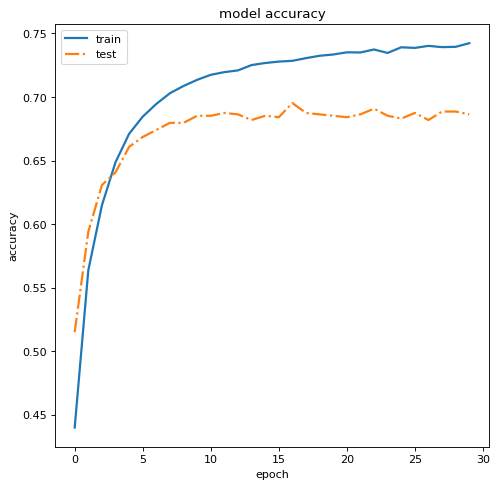

In [11]:
# 코드 3-86 모델의 정확도 및 손실 학습 히스토리 그래프 그리기

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['acc'], '-', linewidth=2) 
plt.plot(history_1.history['val_acc'], '-.', linewidth=2)  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

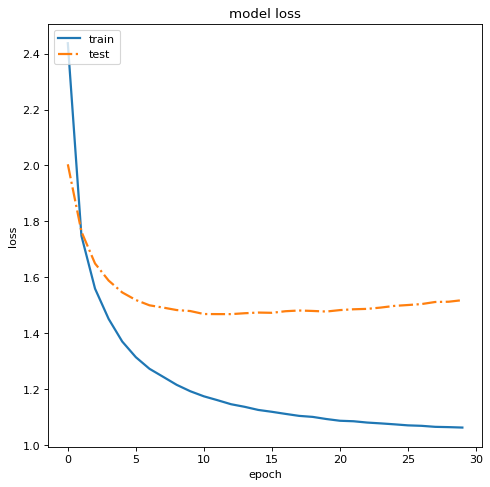

In [12]:
plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['loss'], '-', linewidth=2)  
plt.plot(history_1.history['val_loss'], '-.', linewidth=2)  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [13]:
# 코드 3-87 시험셋을 이용한 모델 평가

score_1 = model_v1.evaluate(x_test_vec, y_test_onehot,
                       batch_size=32, verbose=1)
print('Test score:', score_1[0])
print('Test accuracy:', score_1[1])

2246/2246 [==============================] - 0s 50us/step
Test score: 1.472517568939834
Test accuracy: 0.6874443455296548


## 3.4.4 함수로 모델 정의하기

In [0]:
# 코드 3-88 함수로 모델 정의하기

def get_model_v2(input_shape):
  inputs = Input(shape=(input_shape,))
  hidden1 = Dense(256, activation='relu')(inputs)
  dropout = Dropout(0.5)(hidden1)
  outputs = Dense(46, activation='softmax')(dropout)
  model = Model(inputs=inputs, outputs=outputs)
  
  return model

In [15]:
# 코드 3-91 모델 생성, 컴파일 학습하기

model_v2 = get_model_v2(input_shape=100)
model_v2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
history_2 = model_v2.fit(x_train_vec, y_train_onehot,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 8083 samples, validate on 899 samples
Epoch 1/30
8083/8083 [==============================] - 1s 176us/step - loss: 1.9006 - acc: 0.5451 - val_loss: 1.5530 - val_acc: 0.6529
Epoch 2/30
8083/8083 [==============================] - 1s 139us/step - loss: 1.4503 - acc: 0.6519 - val_loss: 1.4301 - val_acc: 0.6652
Epoch 3/30
8083/8083 [==============================] - 1s 141us/step - loss: 1.3279 - acc: 0.6739 - val_loss: 1.3790 - val_acc: 0.6719
Epoch 4/30
8083/8083 [==============================] - 1s 149us/step - loss: 1.2493 - acc: 0.6838 - val_loss: 1.3388 - val_acc: 0.6874
Epoch 5/30
8083/8083 [==============================] - 1s 150us/step - loss: 1.1950 - acc: 0.6986 - val_loss: 1.3117 - val_acc: 0.6930
Epoch 6/30
8083/8083 [==============================] - 1s 150us/step - loss: 1.1522 - acc: 0.7064 - val_loss: 1.2996 - val_acc: 0.6897
Epoch 7/30
8083/8083 

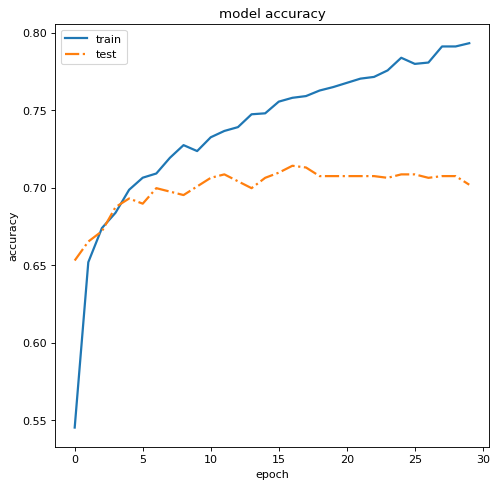

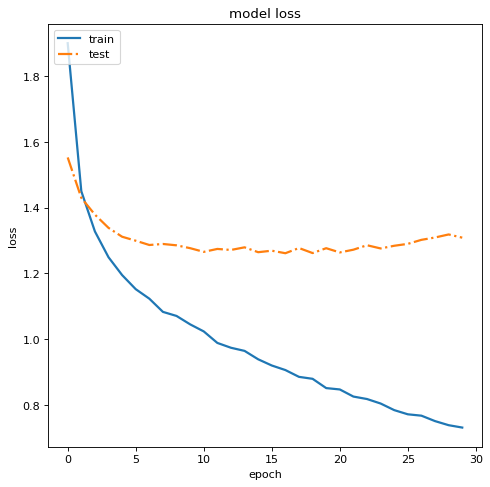

In [16]:
plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_2.history['acc'], '-', linewidth=2) 
plt.plot(history_2.history['val_acc'], '-.', linewidth=2)  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_2.history['loss'], '-', linewidth=2)  
plt.plot(history_2.history['val_loss'], '-.', linewidth=2)  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [17]:
score_2 = model_v2.evaluate(x_test_vec, y_test_onehot,
                       batch_size=32, verbose=1)
print('Test score:', score_2[0])
print('Test accuracy:', score_2[1])

2246/2246 [==============================] - 0s 59us/step
Test score: 1.2659596154866002
Test accuracy: 0.6981300089312577


## 3.4.5 파라미터 조정하기

In [18]:
# 코드 3-90 사전 크기를 늘려 모델 학습하기

max_words = 10000
batch_size = 32
epochs = 30

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

x_train_vec = vectorize_sequences(x_train, dimension=max_words)
x_test_vec = vectorize_sequences(x_test, dimension=max_words)

model_v2 = get_model_v2(max_words)
model_v2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model_v2.summary()

history_2_2 = model_v2.fit(x_train_vec, y_train_onehot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2560256   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)                11822     
Total params: 2,572,078
Trainable params: 2,572,078
Non-trainable params: 0
_________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/30
8083/8083 [==============================] - 3s 340us/step - loss: 1.3728 - acc: 0.7032 - val_loss: 0.9878 - val_acc: 0.7942
Epoch 2/30
8083/8083 [==============================] - 2s 298us

2246/2246 [==============================] - 0s 99us/step
Test score: 1.3450750483005893
Test accuracy: 0.796527159394479


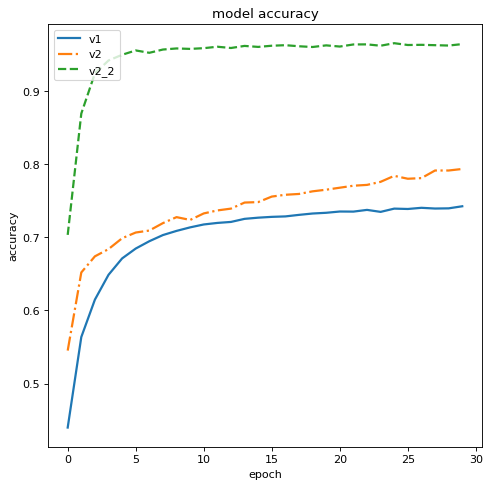

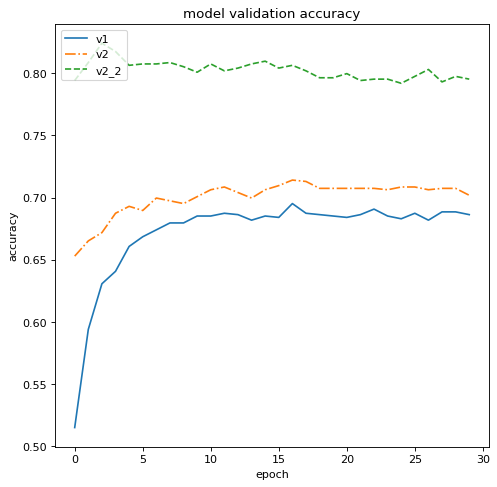

In [19]:
# 코드 3-91 모델 성능 비교 그래프 그리기

score_2_2 = model_v2.evaluate(x_test_vec, y_test_onehot,
                       batch_size=32, verbose=1)
print('Test score:', score_2_2[0])
print('Test accuracy:', score_2_2[1])

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['acc'], '-', linewidth=2) 
plt.plot(history_2.history['acc'], '-.', linewidth=2) 
plt.plot(history_2_2.history['acc'], '--', linewidth=2) 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['v1', 'v2', 'v2_2'], loc='upper left')  
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['val_acc'], '-')  
plt.plot(history_2.history['val_acc'], '-.')  
plt.plot(history_2_2.history['val_acc'], '--')  
plt.title('model validation accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['v1', 'v2', 'v2_2'], loc='upper left')  
plt.show()

## 3.4.6 RNN과 LSTM

In [20]:
# 코드 3-92 LSTM을 이용한 모델 생성

from keras.layers import Embedding, LSTM
from keras.optimizers import Adam
from keras.preprocessing import sequence

num_words = 10000
max_words = 96
batch_size = 256
epochs = 30

def get_lstm_model(input_shape):
  inputs = Input(shape=(input_shape,))
  inputs_emb = Embedding(num_words, input_shape)(inputs)
  hidden2 = LSTM(96, dropout=0.3, recurrent_dropout=0.3, return_sequences=False, activation='tanh')(inputs_emb)
  outputs = Dense(46, activation='softmax')(hidden2)
  model = Model(inputs=inputs, outputs=outputs)
  
  return model

  (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

x_train_seq = sequence.pad_sequences(x_train, maxlen=max_words, padding='post', truncating='post')
x_test_seq = sequence.pad_sequences(x_test, maxlen=max_words, padding='post', truncating='post')

_adam = Adam(lr=0.001)

model_v3 = get_lstm_model(max_words)
model_v3.compile(loss='categorical_crossentropy',
                optimizer=_adam,
                metrics=['accuracy'])
model_v3.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 96)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 96, 96)            960000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dense_6 (Dense)              (None, 46)                4462      
Total params: 1,038,574
Trainable params: 1,038,574
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 코드 3-93 시퀀스 데이터를 이용한 LSTM 모델 학습

history_3 = model_v3.fit(x_train_seq, y_train_onehot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/30
8083/8083 [==============================] - 9s 1ms/step - loss: 3.0058 - acc: 0.3097 - val_loss: 2.4577 - val_acc: 0.3626
Epoch 2/30
8083/8083 [==============================] - 8s 967us/step - loss: 2.3562 - acc: 0.3614 - val_loss: 2.3842 - val_acc: 0.3593
Epoch 3/30
8083/8083 [==============================] - 8s 971us/step - loss: 2.2744 - acc: 0.3958 - val_loss: 2.2649 - val_acc: 0.3682
Epoch 4/30
8083/8083 [==============================] - 8s 949us/step - loss: 2.1138 - acc: 0.4234 - val_loss: 2.0564 - val_acc: 0.4694
Epoch 5/30
8083/8083 [==============================] - 8s 951us/step - loss: 1.9889 - acc: 0.4652 - val_loss: 1.9814 - val_acc: 0.3938
Epoch 6/30
8083/8083 [==============================] - 8s 967us/step - loss: 1.9492 - acc: 0.4787 - val_loss: 1.9207 - val_acc: 0.4305
Epoch 7/30
8083/8083 [==============================] - 8s 963us/step - loss: 1.8633 - acc: 0.5019 - val_loss: 1.8507 - val_acc: 0.5517
Epo

In [22]:
# 코드 3-94 시퀀스 데이터를 이용한 LSTM 모델 평가

score_3 = model_v3.evaluate(x_test_seq, y_test_onehot,
                       batch_size=32, verbose=1)
print('Test score:', score_3[0])
print('Test accuracy:', score_3[1])

2246/2246 [==============================] - 6s 3ms/step
Test score: 1.3889034209459463
Test accuracy: 0.6723063224039222


## 3.4.7 Bidirectional LSTM과 CNN-LSTM

In [23]:
# 코드 3-95 Bidirectional LSTM을 이용한 모델 학습

from keras.layers import Bidirectional

def get_bilstm_model(input_shape):
  inputs = Input(shape=(input_shape,))
  inputs_emb = Embedding(num_words, input_shape)(inputs)
  hidden2 = Bidirectional(LSTM(96, dropout=0.3, recurrent_dropout=0.3, return_sequences=False, activation='tanh'))(inputs_emb)
  outputs = Dense(46, activation='softmax')(hidden2)
  model = Model(inputs=inputs, outputs=outputs)
  
  return model

model_v4 = get_bilstm_model(max_words)
model_v4.compile(loss='categorical_crossentropy',
                optimizer=_adam,
                metrics=['accuracy'])
model_v4.summary()

history_4 = model_v4.fit(x_train_seq, y_train_onehot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 96)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 96, 96)            960000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 192)               148224    
_________________________________________________________________
dense_7 (Dense)              (None, 46)                8878      
Total params: 1,117,102
Trainable params: 1,117,102
Non-trainable params: 0
_________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/30
8083/8083 [==============================] - 18s 2ms/step - loss: 2.3190 - acc: 0.4292 - val_loss: 1.7644 - val_acc: 0.5617
Epoch 2/30
8083/8083 [==============================] - 16s 2ms/s

In [24]:
score_4 = model_v4.evaluate(x_test_seq, y_test_onehot,
                       batch_size=32, verbose=1)
print('Test score:', score_4[0])
print('Test accuracy:', score_4[1])

2246/2246 [==============================] - 12s 5ms/step
Test score: 1.3275258505015317
Test accuracy: 0.7626892253424796


In [25]:
# 코드 3-96 CNN-LSTM을 이용한 모델 학습

from keras.layers import Conv1D, MaxPooling1D

def get_cnn_lstm_model(input_shape):
  inputs = Input(shape=(input_shape,))
  inputs_emb = Embedding(num_words, input_shape)(inputs)
  conv_1 = Conv1D(48, 3, padding='same', activation='relu')(inputs_emb)
  pool_1 = MaxPooling1D(pool_size=3)(conv_1)
  drop_1 = Dropout(0.25)(pool_1)
  lstm_2 = Bidirectional(LSTM(48, dropout=0.3, recurrent_dropout=0.3, return_sequences=False, activation='tanh'))(drop_1)  
  outputs = Dense(46, activation='softmax')(lstm_2)
  model = Model(inputs=inputs, outputs=outputs)
  
  return model
  
model_v5 = get_cnn_lstm_model(max_words)
model_v5.compile(loss='categorical_crossentropy',
                optimizer=_adam,
                metrics=['accuracy'])
model_v5.summary()

history_5 = model_v5.fit(x_train_seq, y_train_onehot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 96)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 96, 96)            960000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 48)            13872     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 48)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 48)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 96)                37248     
_________________________________________________________________
dense_8 (Dense)              (None, 46)                446

In [26]:
score_5 = model_v5.evaluate(x_test_seq, y_test_onehot,
                       batch_size=32, verbose=1)
print('Test score:', score_5[0])
print('Test accuracy:', score_5[1])

2246/2246 [==============================] - 4s 2ms/step
Test score: 1.4508251555774856
Test accuracy: 0.7435440784146079


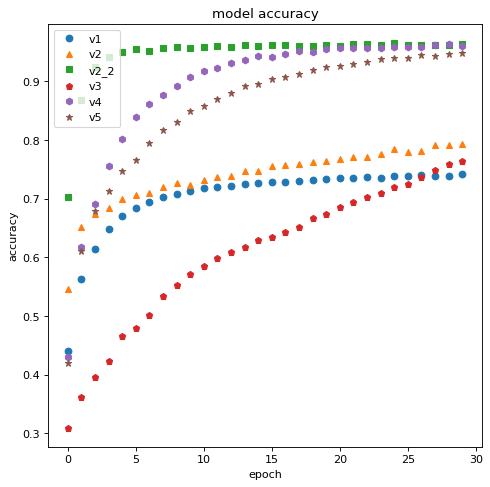

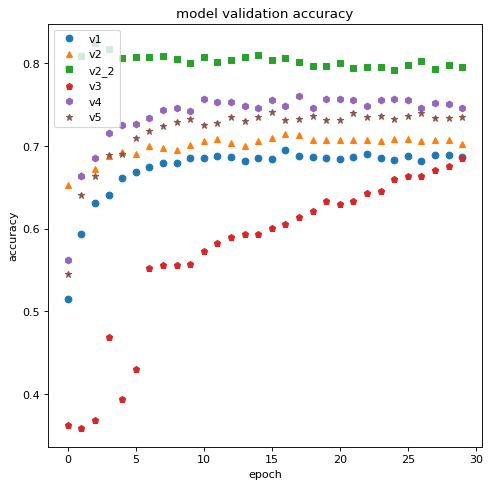

In [27]:
# 코드 3-97 여섯 결과를 비교하는 그래프 그리기

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['acc'], 'o') 
plt.plot(history_2.history['acc'], '^') 
plt.plot(history_2_2.history['acc'], 's') 
plt.plot(history_3.history['acc'], 'p') 
plt.plot(history_4.history['acc'], 'h') 
plt.plot(history_5.history['acc'], '*') 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['v1', 'v2', 'v2_2', 'v3', 'v4', 'v5'], loc='upper left')  
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['val_acc'], 'o')  
plt.plot(history_2.history['val_acc'], '^')  
plt.plot(history_2_2.history['val_acc'], 's')  
plt.plot(history_3.history['val_acc'], 'p') 
plt.plot(history_4.history['val_acc'], 'h') 
plt.plot(history_5.history['val_acc'], '*') 
plt.title('model validation accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['v1', 'v2', 'v2_2', 'v3', 'v4', 'v5'], loc='upper left')  
plt.show()